**线性回归**
损失函数降低到最小
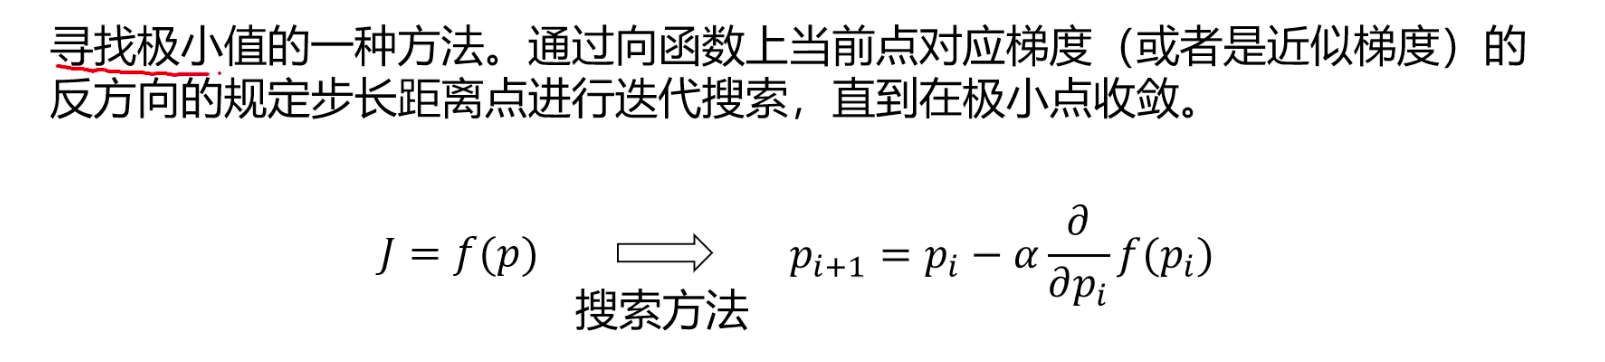


评估函数
1，均方差MSE
2,R方值
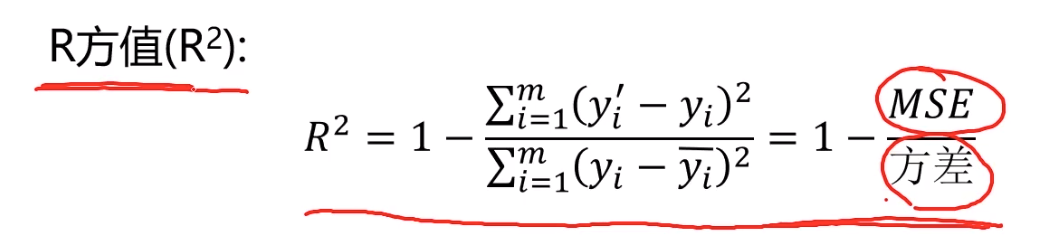

R方值接近1，说明拟合的越好
3，y` 和y的集中度越高越好
使用matplotlib进行绘图。scatter可以绘制散点图。
plt.subplot(211) 2行1列，第1个字图。
plt.subplot(212) 2行2列，第2个字图。


In [31]:
import pandas as pd
data = pd.read_csv('genetated_data.csv')
print(data)

   x   y
0  1   7
1  2   9
2  3  11
3  4  13
4  5  15


In [32]:
x = data.loc[:,'x']
y = data.loc[:,'y']
print(x, y)

0    1
1    2
2    3
3    4
4    5
Name: x, dtype: int64 0     7
1     9
2    11
3    13
4    15
Name: y, dtype: int64


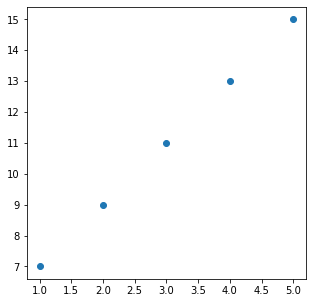

In [33]:
from matplotlib import pyplot as plt
plt.figure(figsize=(5,5))
plt.scatter(x, y)

In [34]:
from sklearn.linear_model import LinearRegression
import numpy as np
x = np.array(x)
y = np.array(y)
x = x.reshape(-1, 1) 
y = y.reshape(-1, 1)
lr_model = LinearRegression()
lr_model.fit(x, y)

LinearRegression()

In [37]:
# 预测
from sklearn.linear_model import LinearRegression 
y_predict = lr_model.predict(x)
print(y)
pre = lr_model.predict([[3.5]])
print("预测的结果",pre)

[[ 7]
 [ 9]
 [11]
 [13]
 [15]]
预测的结果 [[12.]]


In [38]:
# a/b 打印
a = lr_model.coef_
b = lr_model.intercept_
print(a, b)
# 方程为 2x + 5

[[2.]] [5.]


In [39]:
from sklearn.metrics import mean_squared_error, r2_score
MSE = mean_squared_error(y, y_predict)
R2 = r2_score(y, y_predict)
print(MSE, R2)

6.310887241768095e-31 1.0


**房价预测练习**
多因子练习, 线性回归模型

In [40]:
import pandas as pd
import numpy as np
data = pd.read_csv('usa_housing_price.csv')
print(data)

      Avg. Area Income  Avg. Area House Age  Avg. Area Number of Rooms  \
0          79545.45857             5.317139                   7.009188   
1          79248.64245             4.997100                   6.730821   
2          61287.06718             5.134110                   8.512727   
3          63345.24005             3.811764                   5.586729   
4          59982.19723             5.959445                   7.839388   
...                ...                  ...                        ...   
4995       60567.94414             3.169638                   6.137356   
4996       78491.27543             4.000865                   6.576763   
4997       63390.68689             3.749409                   4.805081   
4998       68001.33124             5.465612                   7.130144   
4999       65510.58180             5.007695                   6.792336   

      Area Population        size         Price  
0         23086.80050  188.214212  1.059034e+06  
1         4

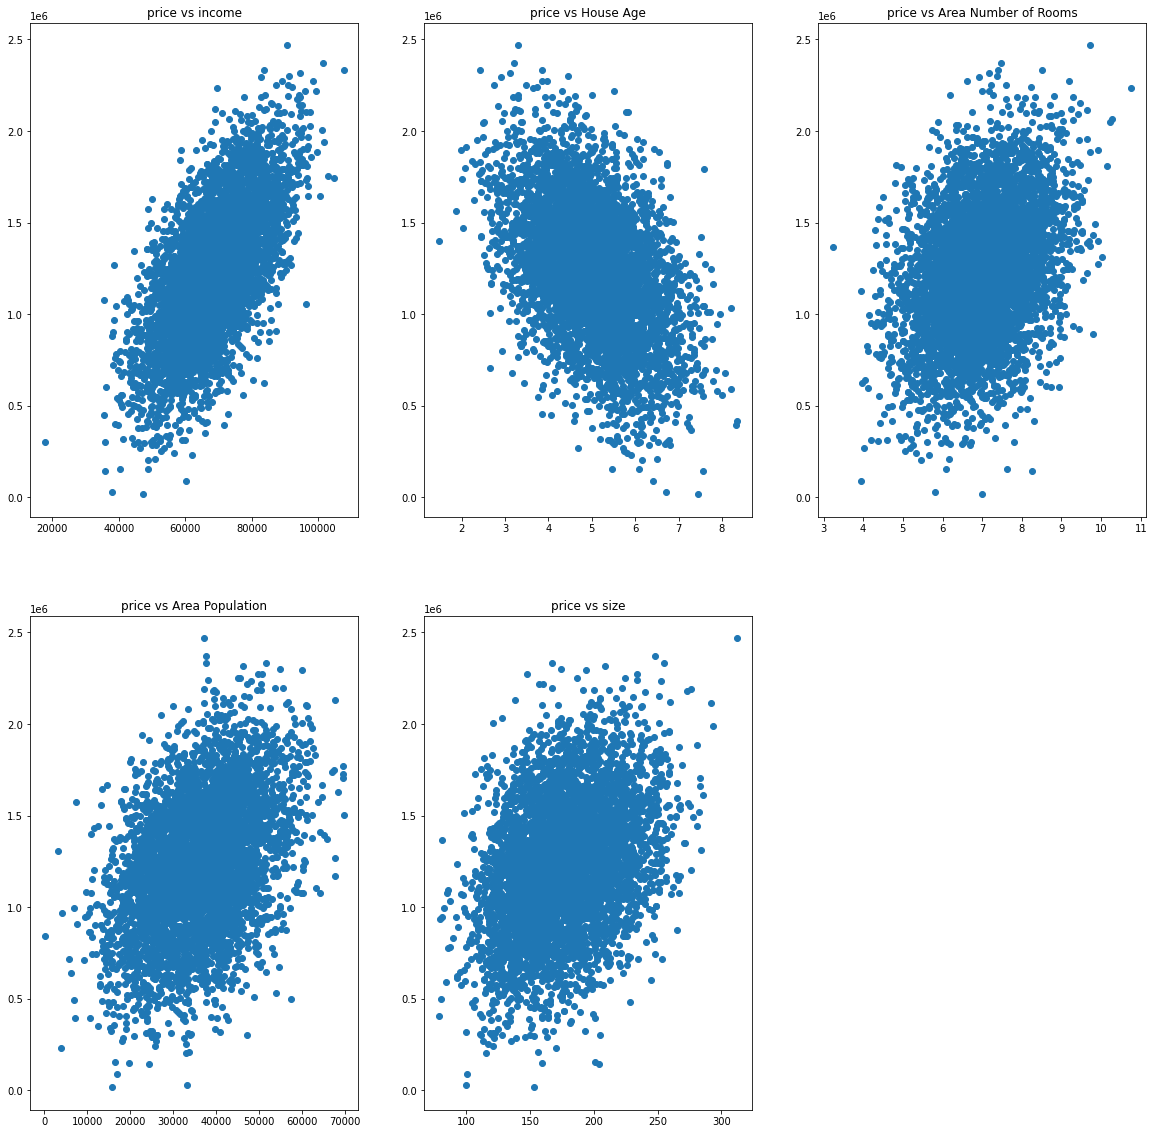

In [41]:
## 单因子模型进行预测 面积 --〉 房价  --> 评估
from matplotlib import pyplot as plt
fig = plt.figure(figsize=(20, 20))
fig1 = plt.subplot(231)
plt.scatter(data.loc[:,'Avg. Area Income'], data.loc[:,'Price'])
plt.title("price vs income")

## 房价 和 房子的年龄
fig2 = plt.subplot(232)
plt.scatter(data.loc[:,'Avg. Area House Age'], data.loc[:,'Price'])
plt.title("price vs House Age")

fig3 = plt.subplot(233)
plt.scatter(data.loc[:,'Avg. Area Number of Rooms'], data.loc[:,'Price'])
plt.title("price vs Area Number of Rooms")

fig4 = plt.subplot(234)
plt.scatter(data.loc[:,'Area Population'], data.loc[:,'Price'])
plt.title("price vs Area Population")

fig5 = plt.subplot(235)
plt.scatter(data.loc[:,'size'], data.loc[:,'Price'])
plt.title("price vs size")
plt.show()


In [23]:
# define X and Y
X = data.loc[:,'size']
Y = data.loc[:,'Price']
print(X, Y)

0       188.214212
1       160.042526
2       227.273545
3       164.816630
4       161.966659
           ...    
4995    161.641403
4996    159.164596
4997    139.491785
4998    184.845371
4999    148.589423
Name: size, Length: 5000, dtype: float64 0       1.059034e+06
1       1.505891e+06
2       1.058988e+06
3       1.260617e+06
4       6.309435e+05
            ...     
4995    1.060194e+06
4996    1.482618e+06
4997    1.030730e+06
4998    1.198657e+06
4999    1.298950e+06
Name: Price, Length: 5000, dtype: float64


In [51]:
## 创建单因子模型
from sklearn.linear_model import LinearRegression
LR1 = LinearRegression()
print(X.shape, Y.shape)
x = np.array(X).reshape(-1, 1)
y = np.array(Y).reshape(-1, 1)
print(x.shape, y.shape)
LR1.fit(x, y)
## 单因子模型 进行预测
y_predict_1 = LR1.predict(x)
print(y, y_predict_1)

(5000,) (5000,)
(5000, 1) (5000, 1)
[[1059033.558]
 [1505890.915]
 [1058987.988]
 ...
 [1030729.583]
 [1198656.872]
 [1298950.48 ]] [[1276881.85636623]
 [1173363.58767144]
 [1420407.32457443]
 ...
 [1097848.86467426]
 [1264502.88144558]
 [1131278.58816273]]


In [25]:
## 评估
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
mean_squared_error_1 = mean_squared_error(y, y_predict_1)
r2_score_1 = r2_score(y, y_predict_1)
print(mean_squared_error_1, r2_score_1)

108771672553.6264 0.1275031240418234


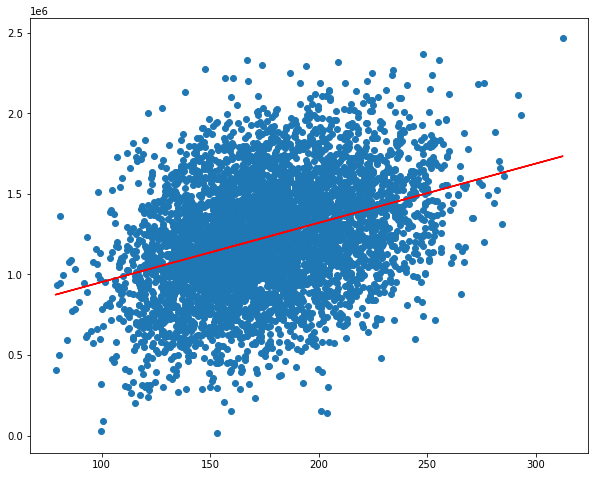

In [26]:
## 绘图进行展示结果
fig6 = plt.figure(figsize=(10, 8))
plt.scatter(x,y)
plt.plot(x,y_predict_1,'r')
plt.show()

In [42]:
## 多因子进行 模型预测
X_multi = data.drop(['Price'], axis=1)
print(X_multi)

      Avg. Area Income  Avg. Area House Age  Avg. Area Number of Rooms  \
0          79545.45857             5.317139                   7.009188   
1          79248.64245             4.997100                   6.730821   
2          61287.06718             5.134110                   8.512727   
3          63345.24005             3.811764                   5.586729   
4          59982.19723             5.959445                   7.839388   
...                ...                  ...                        ...   
4995       60567.94414             3.169638                   6.137356   
4996       78491.27543             4.000865                   6.576763   
4997       63390.68689             3.749409                   4.805081   
4998       68001.33124             5.465612                   7.130144   
4999       65510.58180             5.007695                   6.792336   

      Area Population        size  
0         23086.80050  188.214212  
1         40173.07217  160.042526  
2  

In [53]:
LR_multi = LinearRegression()
#多 因子预测
print(X_multi.shape, y.shape)
LR_multi.fit(X_multi, y)
y_predict_multi = LR_multi.predict(X_multi)
print(y_predict_multi)

## 模型评估


(5000, 5) (5000, 1)
[[1223968.89166087]
 [1497306.3318863 ]
 [1250884.31019438]
 ...
 [1020693.92390375]
 [1260503.36914585]
 [1302737.7915763 ]]


In [55]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
## 平方差预估
mean_squared_error_multi = mean_squared_error(y, y_predict_multi)
## R方值进行预估
r2_score_multi = r2_score(y, y_predict_multi)
print(mean_squared_error_multi, r2_score_multi)

10219846512.17786 0.9180229195220739


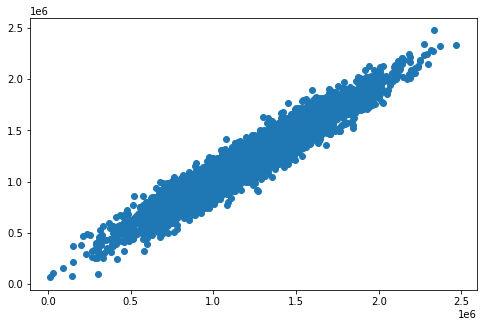

In [58]:
## 模型绘图
fig7 = plt.figure(figsize=(8, 5))
plt.scatter(y, y_predict_multi)
plt.show()